<a href="https://colab.research.google.com/github/jpantojaj/Credit_Scoring_Specialization/blob/main/Sesi%C3%B3n_17_Seguimiento_de_Modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Seguimiento de Nuevas Cosechas**

### **1. Carga Inicial de Librerías**

In [25]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
import warnings
warnings.filterwarnings('ignore')

from sklearn.pipeline import Pipeline

### **2. Carga y Análisis inicial de datos**

In [26]:
df_nc = pd.read_csv('Base_SolicitudesCreditoEfectivo_NuevasCosechas.csv', sep = ",")
df_nc.head()

,CODMES,CODSOLICITUD,DEUDA,PLAZO_CREDITO,FLG_GARANTIA,MIN_MES_DE_DEFAULT,FLG_DEFAULT_12M,SEGMENTOCLIENTE,TARJETA_RELACIONADA,VEHICULAR_RELACIONADA,...,INGRESO_CLIENTE,PROFESION,ZONA_DEL_DESEMBOLSO,ESTADO_CIVIL,EDAD_T,CUOTA,LINEA_DE_TC,MONTO_TC_MEMBRESIA,FLG_TC_VISA,FLG_TC_MC
0,201506,18146,1492.857333,36,0,NaN,0,CLIENTES SIGNATURE,1,0,...,1076.761626,TECNICO,JUNIN,CON,29.0,86.667240,842.0,60.0,0.0,0.0
1,201506,18162,8153.666857,60,0,NaN,0,CLIENTES PLATINUM SEGM 2,0,0,...,7239.348312,INGENIERO,LIMA_SUR,CAS,29.0,1396.311126,7930.0,157.0,1.0,1.0
2,201506,18168,23325.895830,60,0,NaN,0,CLIENTES PLATINUM SEGM 2,1,0,...,5115.384021,TECNICO,ANCASH,SOL,32.0,90.223329,20100.0,170.0,0.0,0.0
3,201506,18181,10743.241170,48,0,NaN,0,CLIENTES ORO,0,0,...,2178.714693,INGENIERO DE SISTEMAS,AREQUIPA,SOL,37.0,1676.799222,1679.0,136.0,1.0,1.0
4,201506,18196,2665.816667,36,0,NaN,0,CLIENTES ORO,1,0,...,1299.634324,PROFESOR,LIMA_NORTE,SOL,32.0,47.049240,900.0,60.0,0.0,0.0


In [27]:
df_ref = pd.read_csv('Base_SolicitudesCreditoEfectivo_Test.csv', sep = ",", index_col=False)
df_ref.head()

,CODMES,CODSOLICITUD,DEUDA,PLAZO_CREDITO,FLG_GARANTIA,MIN_MES_DE_DEFAULT,SEGMENTOCLIENTE,TARJETA_RELACIONADA,VEHICULAR_RELACIONADA,HIPOTECARIO_RELACIONADA,...,PROFESION,ZONA_DEL_DESEMBOLSO,ESTADO_CIVIL,EDAD_T,CUOTA,LINEA_DE_TC,MONTO_TC_MEMBRESIA,FLG_TC_VISA,FLG_TC_MC,FLG_DEFAULT_12M
0,201402,10380,5927.368333,24,0,NaN,CLIENTES PLATINUM SEGM 2,1,0,0,...,ECONOMISTA,LIMA_MODERNA,SOL,32.0,1508.99364,30000.0,350.0,0.0,0.0,0
1,201406,18075,1076.656667,12,0,NaN,CLIENTES ORO,1,0,0,...,TECNICO,JUNIN,SOL,30.0,151.06791,15500.0,60.0,0.0,0.0,0
2,201311,1450,2685.572044,48,0,201405.0,CLIENTES ORO,1,0,0,...,ADMINISTRADOR,LIMA_ESTE,SOL,27.0,5.46000,500.0,60.0,0.0,0.0,1
3,201310,11242,4310.813333,24,0,NaN,CLIENTES ORO,1,0,0,...,TECNICO,CUZCO,SOL,44.0,251.50104,6290.0,170.0,0.0,0.0,0
4,201405,17106,482.073022,12,0,NaN,CLIENTES ORO,1,0,0,...,TECNICO,PIURA,SOL,24.0,31.93596,1500.0,60.0,0.0,0.0,0


#### Corregimos los tipos de variables, este paso es circunstancial

In [28]:
df_ref['CODMES']=df_ref['CODMES'].astype(str)
df_ref['CODSOLICITUD']=df_ref['CODSOLICITUD'].astype(str)
df_ref['MIN_MES_DE_DEFAULT']=df_ref['MIN_MES_DE_DEFAULT'].astype(str)
df_ref['FLG_GARANTIA']=df_ref['FLG_GARANTIA'].astype(str)
df_ref['TARJETA_RELACIONADA']=df_ref['TARJETA_RELACIONADA'].astype(str)
df_ref['VEHICULAR_RELACIONADA']=df_ref['VEHICULAR_RELACIONADA'].astype(str)
df_ref['HIPOTECARIO_RELACIONADA']=df_ref['HIPOTECARIO_RELACIONADA'].astype(str)
df_ref['CLASIF_SISTEMA_ULT_12M']=df_ref['CLASIF_SISTEMA_ULT_12M'].astype(str)
df_ref['FLG_PDH']=df_ref['FLG_PDH'].astype(str)
df_ref['FLG_TC_VISA']=df_ref['FLG_TC_VISA'].astype(str)
df_ref['FLG_TC_MC']=df_ref['FLG_TC_MC'].astype(str)

In [29]:
df_nc['CODMES']=df_nc['CODMES'].astype(str)
df_nc['CODSOLICITUD']=df_nc['CODSOLICITUD'].astype(str)
df_nc['MIN_MES_DE_DEFAULT']=df_nc['MIN_MES_DE_DEFAULT'].astype(str)
df_nc['FLG_GARANTIA']=df_nc['FLG_GARANTIA'].astype(str)
df_nc['TARJETA_RELACIONADA']=df_nc['TARJETA_RELACIONADA'].astype(str)
df_nc['VEHICULAR_RELACIONADA']=df_nc['VEHICULAR_RELACIONADA'].astype(str)
df_nc['HIPOTECARIO_RELACIONADA']=df_nc['HIPOTECARIO_RELACIONADA'].astype(str)
df_nc['CLASIF_SISTEMA_ULT_12M']=df_nc['CLASIF_SISTEMA_ULT_12M'].astype(str)
df_nc['FLG_PDH']=df_nc['FLG_PDH'].astype(str)
df_nc['FLG_TC_VISA']=df_nc['FLG_TC_VISA'].astype(str)
df_nc['FLG_TC_MC']=df_nc['FLG_TC_MC'].astype(str)

#### Como se ve nuestra muestra de referencia

# Buen_Pagador: 8977
# 1 Mora_12M: 607
Bad rate: 0.0633347245409015


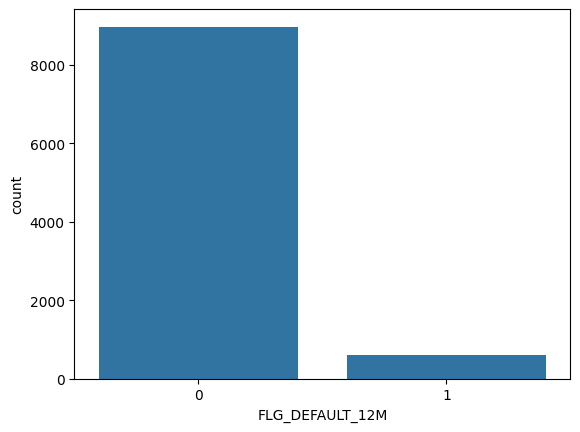

In [30]:
sns.countplot(data = df_ref, x = "FLG_DEFAULT_12M")
target_count = df_ref.FLG_DEFAULT_12M.value_counts()
print('# Buen_Pagador:', target_count[0])
print('# 1 Mora_12M:', target_count[1])
print('Bad rate:', target_count[1]/(target_count[0]+target_count[1]))

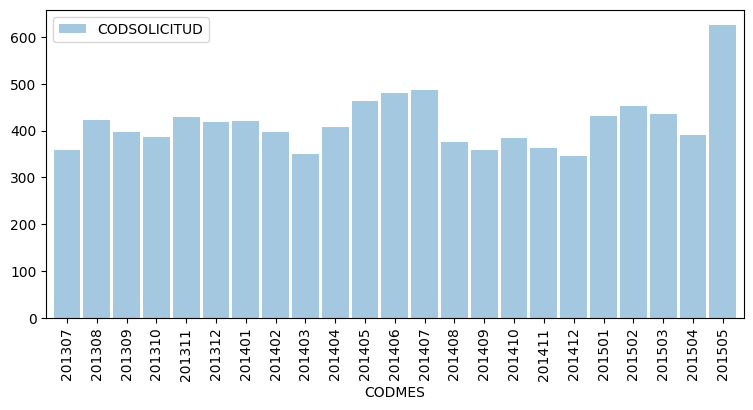

In [31]:
a1=df_ref.pivot_table(values="CODSOLICITUD", index="CODMES", aggfunc="count", sort=True)
a1.plot(kind = 'bar',
       #stacked = 'True',          # Muestra las barras apiladas
       alpha = 0.4,               # nivel de transparencia
       width = 0.9,               # Grosor de las barras para dejar espacio entre ellas
       figsize=(9,4));            # Cambiamos el tamaño de la figura

<Axes: xlabel='CODMES'>

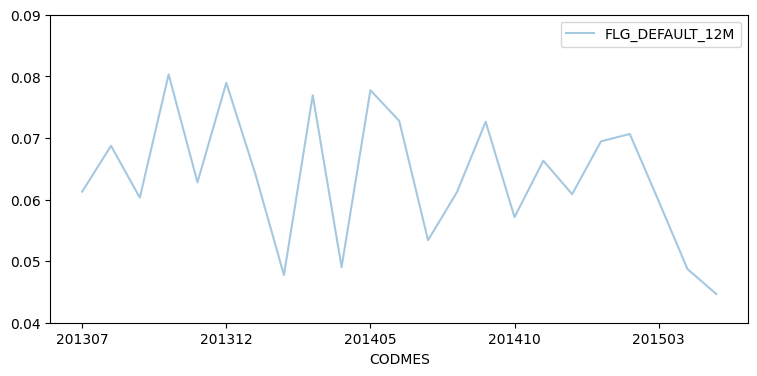

In [32]:
a2=df_ref.pivot_table(values="FLG_DEFAULT_12M", index="CODMES", aggfunc="mean", sort=True)
a2.plot(alpha = 0.4, figsize=(9,4), ylim=(0.04,0.09))

####  Como se ve la nueva muestra

# Buen_Pagador: 8423
# 1 Mora_12M: 550
Bad rate: 0.06129499609940934


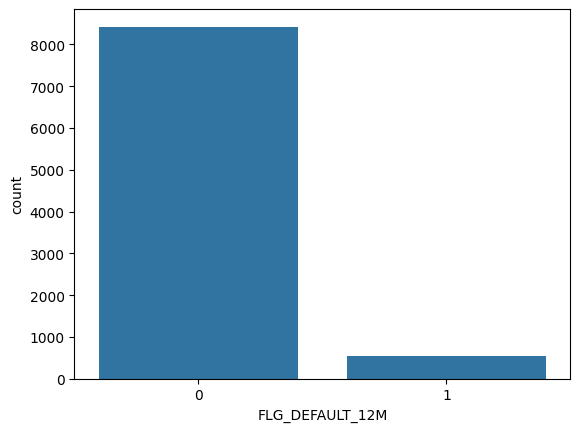

In [33]:
sns.countplot(data = df_nc, x = "FLG_DEFAULT_12M")
target_count = df_nc.FLG_DEFAULT_12M.value_counts()
print('# Buen_Pagador:', target_count[0])
print('# 1 Mora_12M:', target_count[1])
print('Bad rate:', target_count[1]/(target_count[0]+target_count[1]))

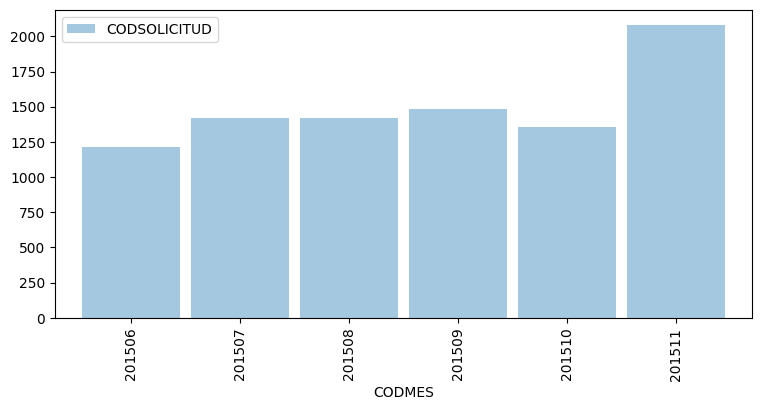

In [34]:
a1=df_nc.pivot_table(values="CODSOLICITUD", index="CODMES", aggfunc="count", sort=True)
a1.plot(kind = 'bar',
       #stacked = 'True',          # Muestra las barras apiladas
       alpha = 0.4,               # nivel de transparencia
       width = 0.9,               # Grosor de las barras para dejar espacio entre ellas
       figsize=(9,4));            # Cambiamos el tamaño de la figura

<Axes: xlabel='CODMES'>

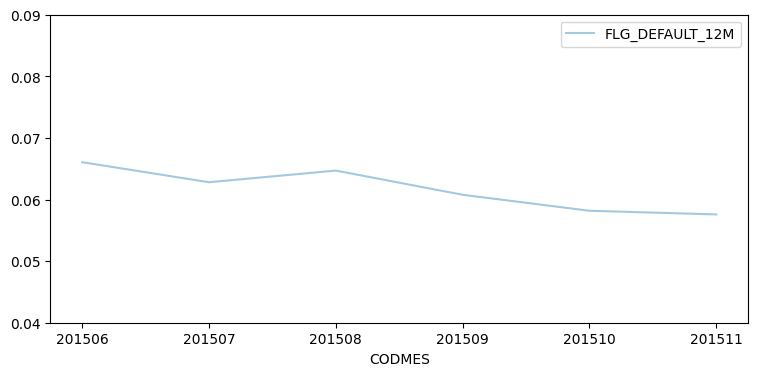

In [35]:
a2=df_nc.pivot_table(values="FLG_DEFAULT_12M", index="CODMES", aggfunc="mean", sort=True)
a2.plot(alpha = 0.4, figsize=(9,4), ylim=(0.04,0.09))

### **3. Carga de los artefactos desarrollados en el entranamiento**

#### En esta parte, llamamos a los pickles del Feature Engineering como del Modelo Final para su uso

In [36]:
import pickle

In [37]:
pip install feature_engine

In [38]:
# Cargar el pipeline del feature engineering
with open('fe_pipeline.pickle','rb') as fe_data_file:
     fe_final = pickle.load(fe_data_file)

In [39]:
# Cargar el modelo
with open('final_model.pickle','rb') as modelFile:
     modelo_final = pickle.load(modelFile)

### Declaremos las variables que se usaran de las Bases o MDTs cargadas

In [40]:
cat_cols_2=['SEGMENTOCLIENTE','CLASIF_SISTEMA_ULT_12M','FLG_PDH','PROFESION','ZONA_DEL_DESEMBOLSO','ESTADO_CIVIL']

In [41]:
num_cols_2=['PLAZO_CREDITO','MESES_AHORROS_ULT_6M','MEDIANA_AHORROS_ULT_6M','NUMERO_DE_PAGOS_PDH', 'INGRESO_CLIENTE',
            'EDAD_T','LINEA_DE_TC', 'MONTO_TC_MEMBRESIA']

### Con lo anterior apliquemos los pickles a nuestras muestras

In [42]:
#Probemos el pipeline
df_ref_xt=fe_final.transform(df_ref.drop(['FLG_DEFAULT_12M'],axis=1))
df_nc_xt=fe_final.transform(df_nc.drop(['FLG_DEFAULT_12M'],axis=1))
df_ref_y=df_ref['FLG_DEFAULT_12M']
df_nc_y=df_nc['FLG_DEFAULT_12M']

In [43]:
df_ref_xt_sel=pd.concat([df_ref_xt[cat_cols_2],df_ref_xt[num_cols_2]],axis=1)
df_nc_xt_sel=pd.concat([df_nc_xt[cat_cols_2],df_nc_xt[num_cols_2]],axis=1)

### **4. ROC y GINI**

#### Primero, evaluemos el poder predictivo del modelo en la nueva muestra, comparado con las métricas obtenidas en la muestra de referencia (test)

In [44]:
from sklearn.metrics import roc_auc_score

In [85]:
# Probemos el modelo
pred_ref = modelo_final.predict_proba(df_ref_xt_sel)
pred_nc = modelo_final.predict_proba(df_nc_xt_sel)
print('BaseLine roc-auc: ',roc_auc_score(df_ref_y, pred_ref[:,1]), 'GINI: ', 2*roc_auc_score(df_ref_y, pred_ref[:,1])-1 )
print('New roc-auc: ', roc_auc_score(df_nc_y, pred_nc[:,1]), 'GINI: ', 2*roc_auc_score(df_nc_y, pred_nc[:,1])-1 )

BaseLine roc-auc:  0.7682408769693151 GINI:  0.5364817539386302
New roc-auc:  0.7866128457794136 GINI:  0.5732256915588272


#### Luego, también es importante verificar como se ve el poder discriminatorio de cada variable en la nueva muestra vs el baseline (referencia)

In [46]:
from sklearn.tree import DecisionTreeClassifier

Text(0, 0.5, 'GINI Baseline')

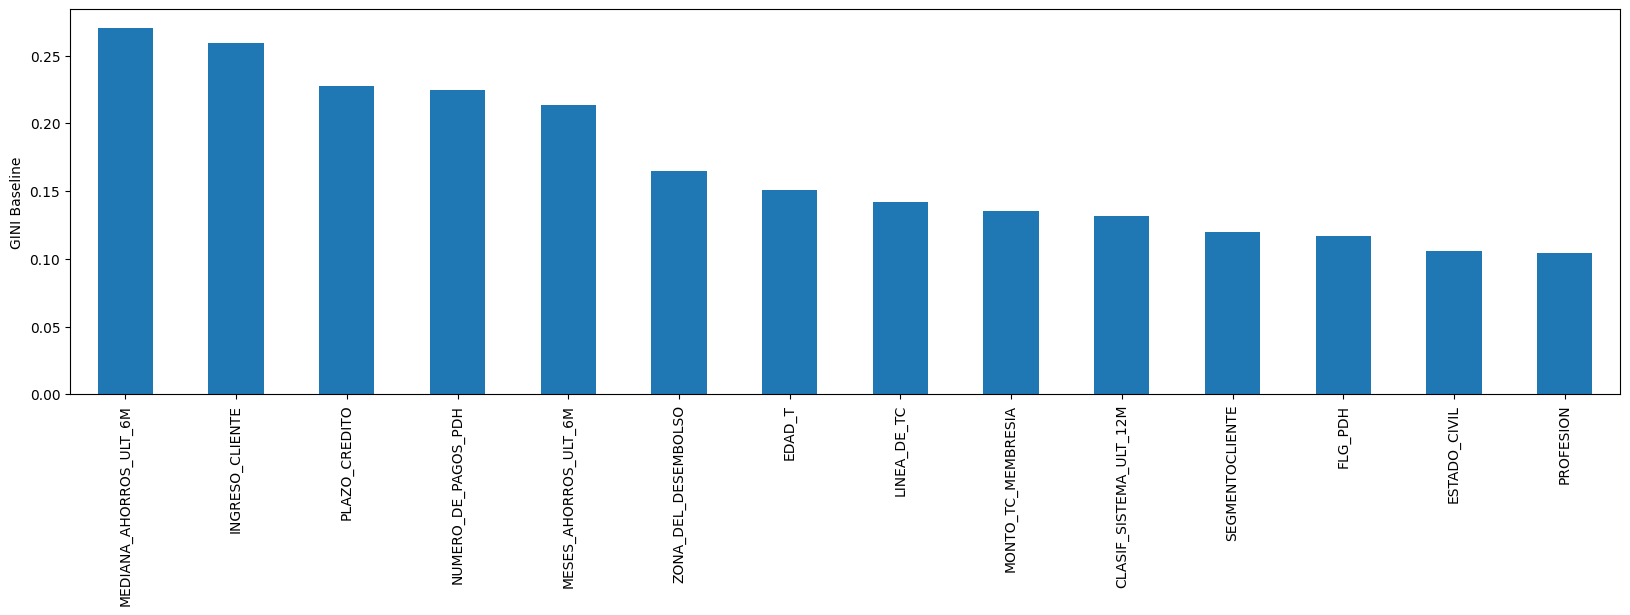

In [47]:
roc_values = []
for feature in df_ref_xt_sel.columns:
    clf = DecisionTreeClassifier(max_depth= 4, min_samples_split=0.4674032789842478, random_state=0)
    clf.fit(df_ref_xt_sel[feature].to_frame(), df_ref_y)
    y_scored = clf.predict_proba(df_ref_xt_sel[feature].to_frame())
    roc_values.append(roc_auc_score(df_ref_y, y_scored[:, 1]))

GINI = pd.Series(roc_values)*2-1
GINI.index = df_ref_xt_sel.columns
GINI.sort_values(ascending=False).plot.bar(figsize=(20, 5))
plt.ylabel('GINI Baseline')

Text(0, 0.5, 'GINI New')

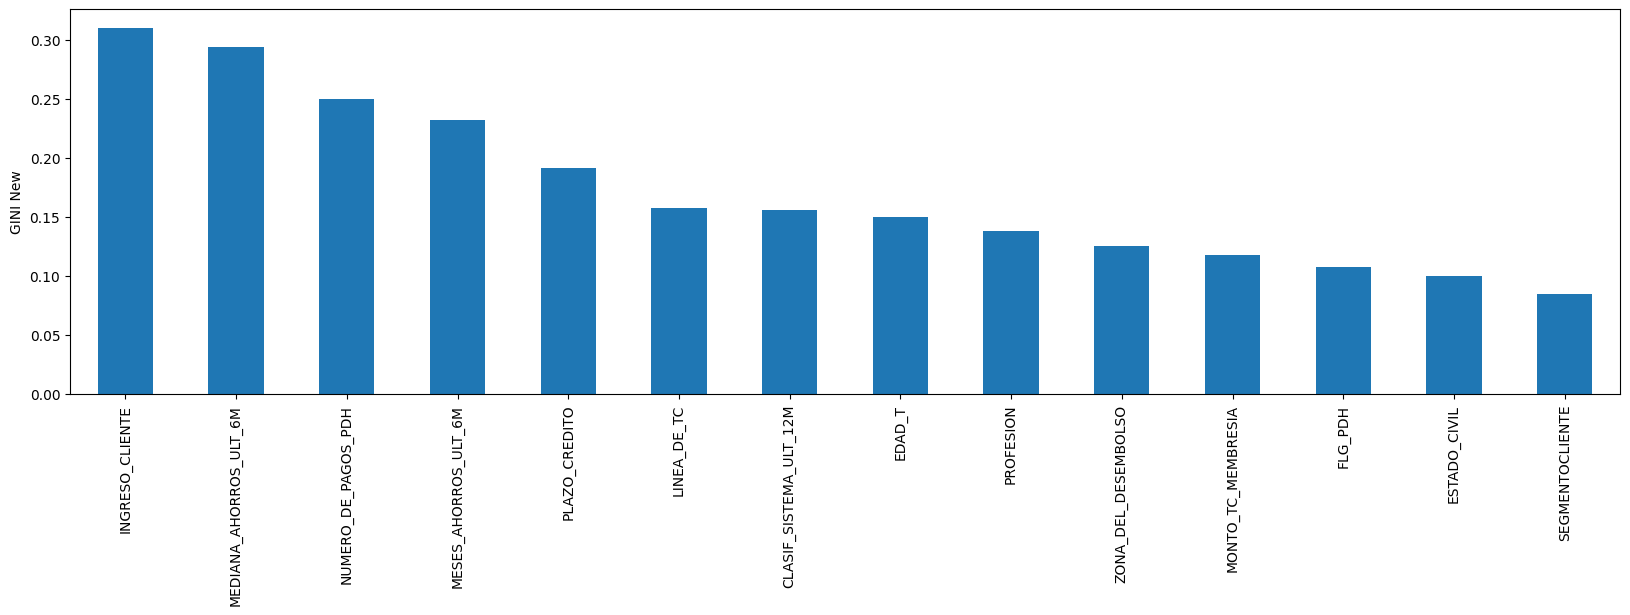

In [48]:
roc_values = []
for feature in df_nc_xt_sel.columns:
    clf = DecisionTreeClassifier(max_depth= 4, min_samples_split=0.4674032789842478, random_state=0)
    clf.fit(df_nc_xt_sel[feature].to_frame(), df_nc_y)
    y_scored = clf.predict_proba(df_nc_xt_sel[feature].to_frame())
    roc_values.append(roc_auc_score(df_nc_y, y_scored[:, 1]))

GINI = pd.Series(roc_values)*2-1
GINI.index = df_nc_xt_sel.columns
GINI.sort_values(ascending=False).plot.bar(figsize=(20, 5))
plt.ylabel('GINI New')

### **5. PSI y CSI**

#### EL PSI (Population Stability Index) busca medir la estabilidad de la población basado en la comparación de la distribución por rangos fijos o percentilicos, a partir de un baseline o muestra de referencia

In [96]:
pd.DataFrame(pred_ref[:,1]).describe()

,0
count,9584.000000
mean,0.063793
std,0.064763
min,0.002106
25%,0.020337
50%,0.041827
75%,0.084012
max,0.587255


In [97]:
def scale_range (input, min, max):
    input += -(np.min(input))
    input /= np.max(input) / (max - min)
    input += min
    return input

In [98]:
buckets = 10
raw_breakpoints = np.arange(0, buckets + 1) / (buckets) * 100
breakpoints = scale_range(raw_breakpoints, np.min(pred_ref[:,1]), np.max(pred_ref[:,1]))

In [99]:
initial_counts = np.histogram(pred_ref[:,1], breakpoints)[0]
new_counts = np.histogram(pred_nc[:,1], breakpoints)[0]

In [100]:
df = pd.DataFrame({'Bucket': np.arange(1, 11), 'Breakpoint Value':breakpoints[1:], 'Initial Count':initial_counts, 'New Count':new_counts})
df['Initial Percent'] = df['Initial Count'] / len(pred_ref[:,1])
df['New Percent'] = df['New Count'] / len(pred_nc[:,1])

In [101]:
df['New Percent'][df['New Percent'] == 0] = 0.001

In [102]:
df

,Bucket,Breakpoint Value,Initial Count,New Count,Initial Percent,New Percent
0,1,0.060621,6112,6009,0.637730,0.669676
1,2,0.119136,2040,1818,0.212855,0.202608
2,3,0.177651,810,610,0.084516,0.067982
3,4,0.236166,360,309,0.037563,0.034437
4,5,0.294680,133,112,0.013877,0.012482
5,6,0.353195,86,68,0.008973,0.007578
6,7,0.411710,20,26,0.002087,0.002898
7,8,0.470225,13,8,0.001356,0.000892
8,9,0.528740,7,4,0.000730,0.000446
9,10,0.587255,3,4,0.000313,0.000446


In [103]:
percents = df[['Initial Percent', 'New Percent', 'Bucket']] \
             .melt(id_vars=['Bucket']) \
             .rename(columns={'variable':'Population', 'value':'Percent'})

In [104]:
percents

,Bucket,Population,Percent
0,1,Initial Percent,0.637730
1,2,Initial Percent,0.212855
2,3,Initial Percent,0.084516
3,4,Initial Percent,0.037563
4,5,Initial Percent,0.013877
5,6,Initial Percent,0.008973
6,7,Initial Percent,0.002087
7,8,Initial Percent,0.001356
8,9,Initial Percent,0.000730
9,10,Initial Percent,0.000313


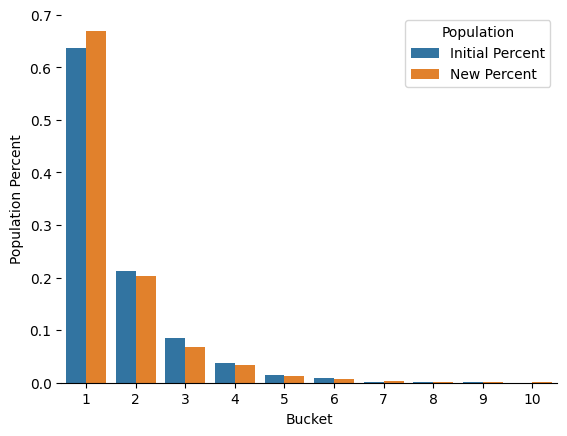

In [105]:
p = sns.barplot(x="Bucket", y="Percent", hue="Population", data=percents)
p.set(xlabel='Bucket', ylabel='Population Percent')
sns.despine(left=True)

In [108]:
df['PSI'] = (df['New Percent'] - df['Initial Percent']) * np.log(df['New Percent'] / df['Initial Percent'])

In [109]:
df

,Bucket,Breakpoint Value,Initial Count,New Count,Initial Percent,New Percent,PSI
0,1,0.060621,6112,6009,0.637730,0.669676,0.001562
1,2,0.119136,2040,1818,0.212855,0.202608,0.000506
2,3,0.177651,810,610,0.084516,0.067982,0.003599
3,4,0.236166,360,309,0.037563,0.034437,0.000272
4,5,0.294680,133,112,0.013877,0.012482,0.000148
5,6,0.353195,86,68,0.008973,0.007578,0.000236
6,7,0.411710,20,26,0.002087,0.002898,0.000266
7,8,0.470225,13,8,0.001356,0.000892,0.000195
8,9,0.528740,7,4,0.000730,0.000446,0.000141
9,10,0.587255,3,4,0.000313,0.000446,0.000047


In [110]:
np.sum(df['PSI'])

0.006970400937902023

#### Seteamos una función para calcular el PSI y CSI

In [111]:
def calculate_psi(expected, actual, buckettype='bins', buckets=10, axis=0):
    def psi(expected_array, actual_array, buckets):
        def scale_range (input, min, max):
            input += -(np.min(input))
            input /= np.max(input) / (max - min)
            input += min
            return input

        breakpoints = np.arange(0, buckets + 1) / (buckets) * 100

        if buckettype == 'bins':
            breakpoints = scale_range(breakpoints, np.min(expected_array), np.max(expected_array))
        elif buckettype == 'quantiles':
            breakpoints = np.stack([np.percentile(expected_array, b) for b in breakpoints])

        expected_fractions = np.histogram(expected_array, breakpoints)[0] / len(expected_array)
        actual_fractions = np.histogram(actual_array, breakpoints)[0] / len(actual_array)

        def sub_psi(e_perc, a_perc):
            if a_perc == 0:
                a_perc = 0.0001
            if e_perc == 0:
                e_perc = 0.0001

            value = (e_perc - a_perc) * np.log(e_perc / a_perc)
            return(value)

        psi_value = sum(sub_psi(expected_fractions[i], actual_fractions[i]) for i in range(0, len(expected_fractions)))

        return(psi_value)

    if len(expected.shape) == 1:
        psi_values = np.empty(len(expected.shape))
    else:
        psi_values = np.empty(expected.shape[1 - axis])

    for i in range(0, len(psi_values)):
        if len(psi_values) == 1:
            psi_values = psi(expected, actual, buckets)
        elif axis == 0:
            psi_values[i] = psi(expected[:,i], actual[:,i], buckets)
        elif axis == 1:
            psi_values[i] = psi(expected[i,:], actual[i,:], buckets)

    return(psi_values)

In [112]:
calculate_psi(pred_ref[:,1], pred_nc[:,1], buckettype='bins', buckets=10, axis=0)

0.006970400937902021

In [113]:
calculate_psi(pred_ref[:,1], pred_nc[:,1], buckettype='quantiles', buckets=10, axis=0)

0.0060649095422380984

#### EL CSI (Characteristic Stability Index) es similar al PSI pero sobre las distribuciones de cada variable

In [114]:
# Rangos Fijos
print("CSI - Rangos Fijos")
for col in df_ref_xt_sel.columns:
    csi_values = calculate_psi(df_ref_xt_sel[col].values, df_nc_xt_sel[col].values, buckettype='bins', buckets=10, axis=0)
    csi = np.sum(csi_values)
    print(f'{col} -> {csi=:.4f}')

CSI - Rangos Fijos
SEGMENTOCLIENTE -> csi=0.0002
CLASIF_SISTEMA_ULT_12M -> csi=0.0007
FLG_PDH -> csi=0.0002
PROFESION -> csi=0.0009
ZONA_DEL_DESEMBOLSO -> csi=0.0005
ESTADO_CIVIL -> csi=0.0012
PLAZO_CREDITO -> csi=0.0045
MESES_AHORROS_ULT_6M -> csi=0.0062
MEDIANA_AHORROS_ULT_6M -> csi=0.0029
NUMERO_DE_PAGOS_PDH -> csi=0.0044
INGRESO_CLIENTE -> csi=0.0019
EDAD_T -> csi=0.0016
LINEA_DE_TC -> csi=0.0008
MONTO_TC_MEMBRESIA -> csi=0.0004


In [115]:
# Rangos Percentílicos
print("CSI - Rango Percentílicos")
for col in df_ref_xt_sel.columns:
    csi_values = calculate_psi(df_ref_xt_sel[col].values, df_nc_xt_sel[col].values, buckettype='quantile', buckets=10, axis=0)
    csi = np.sum(csi_values)
    print(f'{col} -> {csi=:.4f}')

CSI - Rango Percentílicos
SEGMENTOCLIENTE -> csi=0.0000
CLASIF_SISTEMA_ULT_12M -> csi=0.0003
FLG_PDH -> csi=0.0002
PROFESION -> csi=0.0001
ZONA_DEL_DESEMBOLSO -> csi=0.0002
ESTADO_CIVIL -> csi=0.0000
PLAZO_CREDITO -> csi=0.0004
MESES_AHORROS_ULT_6M -> csi=0.0008
MEDIANA_AHORROS_ULT_6M -> csi=0.0006
NUMERO_DE_PAGOS_PDH -> csi=0.0001
INGRESO_CLIENTE -> csi=0.0004
EDAD_T -> csi=0.0002
LINEA_DE_TC -> csi=0.0000
MONTO_TC_MEMBRESIA -> csi=0.0000


### **6. Calibración**

#### Veamos rápidamente la PD Promedio vs la RD de la nueva muestra

In [118]:
print('La PD Promedio Baseline es: ', pred_ref[:,1].mean(), 'El RD Baseline es de: ', df_ref_y.mean())

La PD Promedio Baseline es:  0.06379312448267392 El RD Baseline es de:  0.0633347245409015


In [120]:
print('La PD Promedio Nueva es: ', pred_nc[:,1].mean(), 'El RD Baseline es de: ', df_nc_y.mean())

La PD Promedio Nueva es:  0.0600696548646121 El RD Baseline es de:  0.06129499609940934


In [133]:
from sklearn.calibration import calibration_curve
# Una función para evaluar la calibración
def plot_calibration_curve(y_true, probs, bins, strategy):

    fraction_of_positives, mean_predicted_value = calibration_curve(
        y_true, probs, n_bins=bins, strategy=strategy)

    max_val = max(mean_predicted_value)

    plt.figure(figsize=(8,10))
    plt.subplot(2, 1, 1)
    plt.plot(mean_predicted_value, fraction_of_positives, label='PD vs RD')
    plt.plot(np.linspace(0, max_val, bins), np.linspace(0, max_val, bins),
         linestyle='--', color='red', label='Perfect calibration')

    plt.xlabel('Probability Predictions')
    plt.ylabel('Fraction of positive examples')
    plt.title('Calibration Curve')
    plt.legend(loc='upper left')


    plt.subplot(2, 1, 2)
    plt.hist(probs, range=(0, 1), bins=bins, density=True, stacked=True, alpha=0.3)
    plt.xlabel('Probability Predictions')
    plt.ylabel('Fraction of examples')
    plt.title('Density')
    plt.show()

#### Como se ve en la muestra inicial o de test

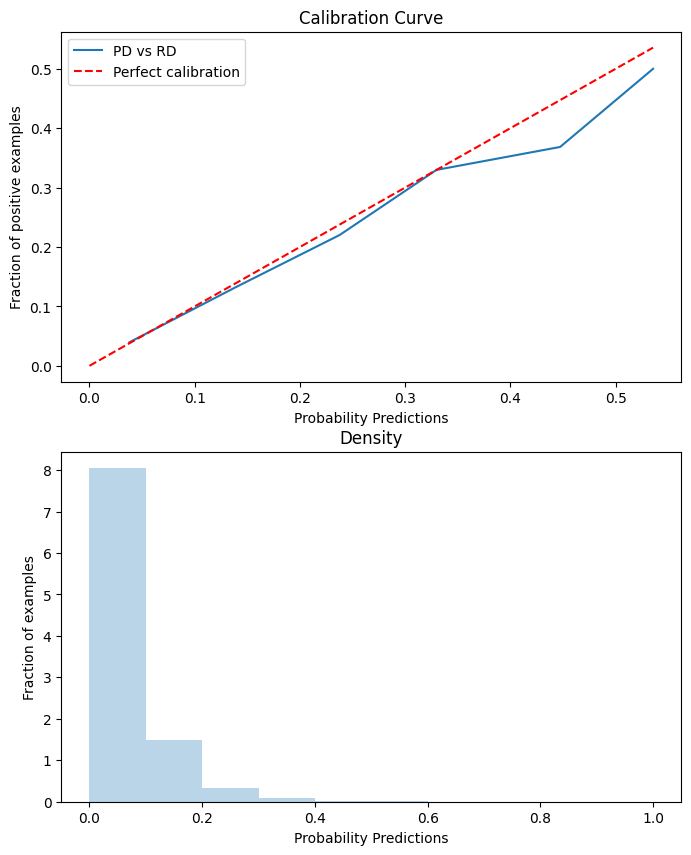

In [134]:
plot_calibration_curve(df_ref_y, pred_ref[:, 1], bins=10, strategy='uniform')

#### Como se ve en la nueva cosecha

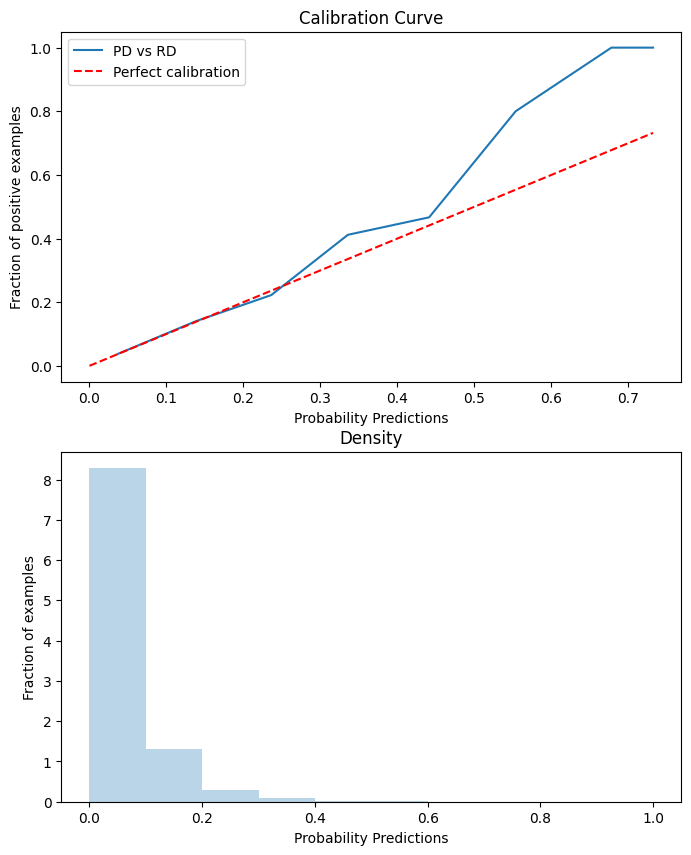

In [135]:
plot_calibration_curve(df_nc_y, pred_nc[:, 1], bins=10, strategy='uniform')

In [136]:
from sklearn.calibration import CalibratedClassifierCV

In [137]:
# Calibración Sigmoide
cal_sigmoid = CalibratedClassifierCV(modelo_final, cv='prefit', method='sigmoid')
cal_sigmoid.fit(df_nc_xt_sel, df_nc_y)
prob_sigmoid = cal_sigmoid.predict_proba(df_nc_xt_sel)[:, 1]

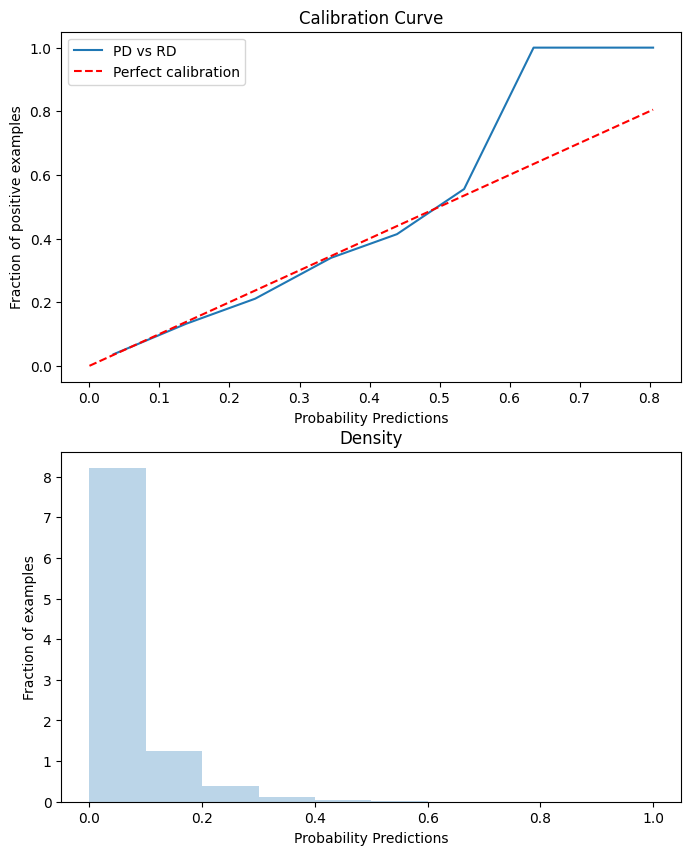

In [138]:
plot_calibration_curve(df_nc_y, prob_sigmoid, bins=10, strategy='uniform')